In [2]:
# Sentiment Analysis program that parses the tweets from Twitter.

In [88]:
#Libraries
import tweepy
from textblob import TextBlob #for sentiment analysis
import pandas as pd
import matplotlib.pyplot as plt
import re #to work with string data
from wordcloud import WordCloud
plt.style.use('fivethirtyeight')

In [89]:
#Import the Twitter APT
APIKey="1BbDH8pONUrBxUxmLXAPxXapZ"
APISecretKey="3qPqCBpTxohHQYlX0HlNTJcixd2fvd2FQkGnbQKdkJiWUFPJfw"
AccessToken="1379319975006007298-yxyTrc3pl3vZenoXQJyRXQyNLVeOuO"
AccessTokenSecret="z0bMcojmINMAJferAkGHMn5ZBvaJOJYHbzltdTriaSoaP"

In [90]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(APIKey,APISecretKey)
authenticate.set_access_token(AccessToken,AccessTokenSecret)
api = tweepy.API(authenticate)

In [92]:
posts = api.user_timeline(screen_name = 'Technology', cout = 100, lang = 'eg', tweet_mode = 'extended')
i = 1
for tweet in posts[ :20:]: # Top 20 tweets in 100 tweets
  print(str(i) +') ' + tweet.full_text + '\n')
  i+=1

1) RT @crypto: Ether hits $3,000 for the first time as #Bitcoin’s #crypto dominance declines https://t.co/cyRR6dYvPF 

More on @crypto: https:…

2) Francisco Partners, TPG agree to buy Dell’s Boomi for $4 billion https://t.co/kVBOBA7kEI

3) Dell is close to selling its Boomi cloud business to private-equity firms Francisco Partners and TPG in a deal that values the platform at $4 billion including debt, Dow Jones reported, citing people familiar https://t.co/QoHQ0hrlBb

4) Verizon is nearing an agreement to sell its media division to Apollo Global Management, sources say https://t.co/n9paRvy9H5

5) Intel plans to reduce its focus on share repurchases going forward, according to its new Chief Executive Officer Pat Gelsinger https://t.co/lRC3Ojz3gt

6) A social media post by China’s top law enforcement body juxtaposing the country’s successful launch of a module into space with grim cremation pyres in India was deleted after it sparked online criticism in China https://t.co/eAae5Vt8CK

7

In [93]:
# Create a DataFrame with a column called tweets
df = pd.DataFrame([tweet.full_text for tweet in posts],columns = ['Tweets'])
df

,Tweets
0,"RT @crypto: Ether hits $3,000 for the first ti..."
1,"Francisco Partners, TPG agree to buy Dell’s Bo..."
2,Dell is close to selling its Boomi cloud busin...
3,Verizon is nearing an agreement to sell its me...
4,Intel plans to reduce its focus on share repur...
5,A social media post by China’s top law enforce...
6,Elon Musk’s SpaceX returned four astronauts to...
7,Apple’s App Store had a 78% operating margin i...
8,Apple’s App Store had a 78% operating margin i...
9,RT @BloombergLive: What makes the most sense f...


In [94]:
# Cleaning the data by making a function
def cleanText(text):
  text = re.sub('@[AaZa-z0-9]+','',text) #reming mentions
  text = re.sub("#",'',text)  #removing #
  text = re.sub('Rt[\s]+','',text)  #removing Retweets
  tezt = re.sub('https?:\/\/\S+','',text)  #removing links
  return text

In [95]:
# applying the function to clean tweets
df['Tweets'] = df['Tweets'].apply(cleanText)

In [96]:
df

,Tweets
0,"RT : Ether hits $3,000 for the first time as B..."
1,"Francisco Partners, TPG agree to buy Dell’s Bo..."
2,Dell is close to selling its Boomi cloud busin...
3,Verizon is nearing an agreement to sell its me...
4,Intel plans to reduce its focus on share repur...
5,A social media post by China’s top law enforce...
6,Elon Musk’s SpaceX returned four astronauts to...
7,Apple’s App Store had a 78% operating margin i...
8,Apple’s App Store had a 78% operating margin i...
9,RT @BloombergLive: What makes the most sense f...


In [97]:
# create a function to get the subjectivity of all the tweets
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# create a function to get the polarity of all the tweets
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# creating 2 columns 'Subjectivity' and 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

In [98]:
df

,Tweets,Subjectivity,Polarity
0,"RT : Ether hits $3,000 for the first time as B...",0.416667,0.375000
1,"Francisco Partners, TPG agree to buy Dell’s Bo...",0.000000,0.000000
2,Dell is close to selling its Boomi cloud busin...,0.500000,0.375000
3,Verizon is nearing an agreement to sell its me...,0.000000,0.000000
4,Intel plans to reduce its focus on share repur...,0.454545,0.136364
5,A social media post by China’s top law enforce...,0.629167,0.070833
6,Elon Musk’s SpaceX returned four astronauts to...,0.136752,0.083333
7,Apple’s App Store had a 78% operating margin i...,0.400000,0.100000
8,Apple’s App Store had a 78% operating margin i...,0.400000,0.100000
9,RT @BloombergLive: What makes the most sense f...,0.500000,0.500000


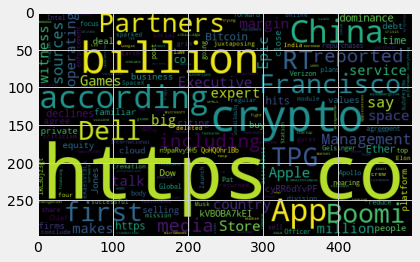

In [99]:
# Word Cloud Visualization
allwords = ' '.join([i for i in df['Tweets']])
Cloud = WordCloud(width = 500, height = 300, random_state = 0, max_font_size = 100).generate(allwords)

plt.imshow(Cloud)
plt.show()

In [100]:
# create a funtion to compute negative, neutral and positive 

def gteAnalysis(score):
  if score<0:
    return 'Negative'
  elif score==0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(gteAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,"RT : Ether hits $3,000 for the first time as B...",0.416667,0.375000,Positive
1,"Francisco Partners, TPG agree to buy Dell’s Bo...",0.000000,0.000000,Neutral
2,Dell is close to selling its Boomi cloud busin...,0.500000,0.375000,Positive
3,Verizon is nearing an agreement to sell its me...,0.000000,0.000000,Neutral
4,Intel plans to reduce its focus on share repur...,0.454545,0.136364,Positive
5,A social media post by China’s top law enforce...,0.629167,0.070833,Positive
6,Elon Musk’s SpaceX returned four astronauts to...,0.136752,0.083333,Positive
7,Apple’s App Store had a 78% operating margin i...,0.400000,0.100000,Positive
8,Apple’s App Store had a 78% operating margin i...,0.400000,0.100000,Positive
9,RT @BloombergLive: What makes the most sense f...,0.500000,0.500000,Positive


In [101]:
df['Analysis'].value_counts()

Positive    12
Neutral      6
Negative     2
Name: Analysis, dtype: int64

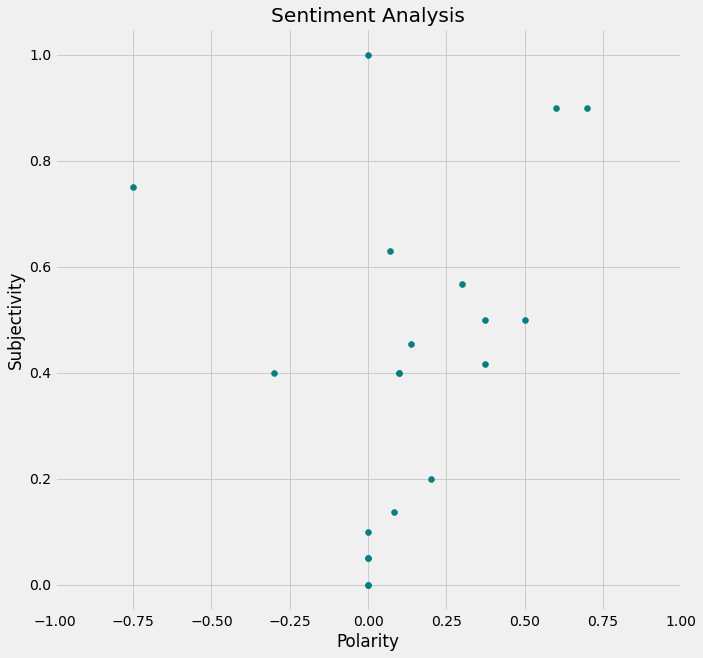

In [102]:
# plotting the scatter plot
plt.figure(figsize = (10,10))

for i in range (0,df.shape[0]):
  plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color = 'Teal')

plt.title("Sentiment Analysis")
plt.xlim(-1,1)
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [104]:
# we are able to see only three nuetral analysis because thry are overlapping
df[df['Analysis']=='Neutral']

,Tweets,Subjectivity,Polarity,Analysis
1,"Francisco Partners, TPG agree to buy Dell’s Bo...",0.00,0.0,Neutral
3,Verizon is nearing an agreement to sell its me...,0.00,0.0,Neutral
14,Quarantine boredom drives demand for renting i...,0.10,0.0,Neutral
16,"""Coinbase could be the next AOL.""\n\nEstimize ...",0.05,0.0,Neutral
18,Get paid for your tweets? Twitter CFO Ned Sega...,1.00,0.0,Neutral
19,Basecamp’s ban on political talk prompts sever...,0.05,0.0,Neutral


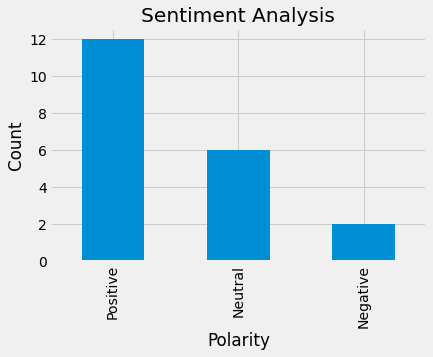

In [107]:
# bar graphs

df['Analysis'].value_counts().plot(kind='bar')
plt.title("Sentiment Analysis")
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.show()